In [7]:
pip install numpy tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


Epoch 1/10
1688/1688 [==============================] - 12s 6ms/step - loss: 0.3556 - accuracy: 0.8930 - val_loss: 0.1138 - val_accuracy: 0.9657
Epoch 2/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1705 - accuracy: 0.9491 - val_loss: 0.0894 - val_accuracy: 0.9748
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1296 - accuracy: 0.9611 - val_loss: 0.0826 - val_accuracy: 0.9757
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1102 - accuracy: 0.9668 - val_loss: 0.0726 - val_accuracy: 0.9782
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0960 - accuracy: 0.9703 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0824 - accuracy: 0.9745 - val_loss: 0.0726 - val_accuracy: 0.9798
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.0734 - val_accurac

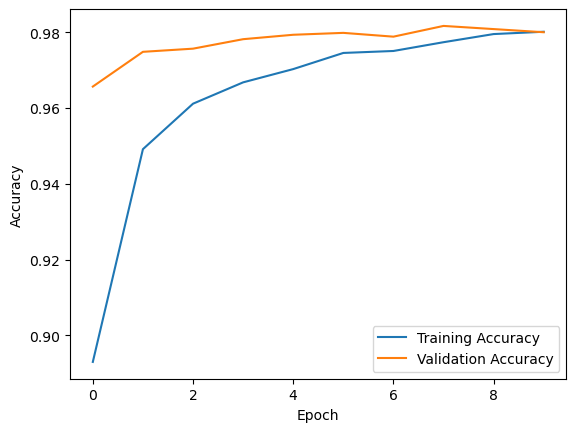

313/313 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9789
Test loss: 0.0757
Test accuracy: 0.9789
1/1 [==============================] - 0s 159ms/step


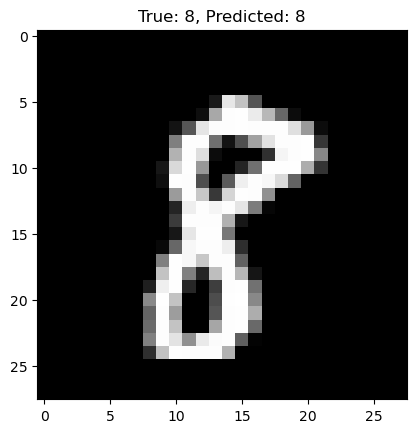

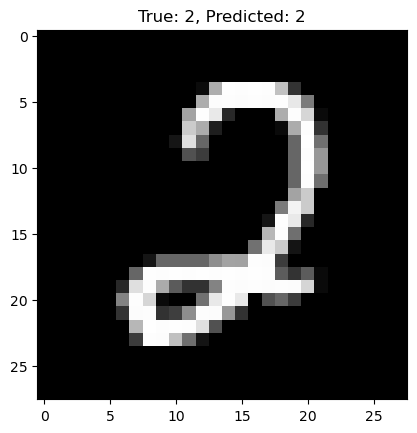

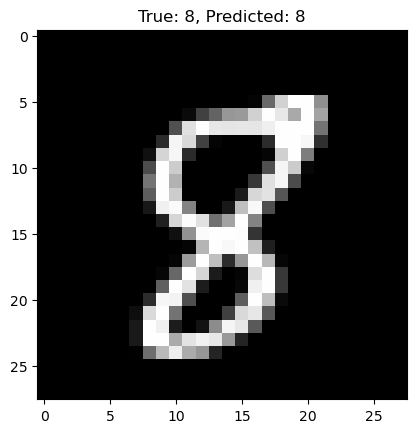

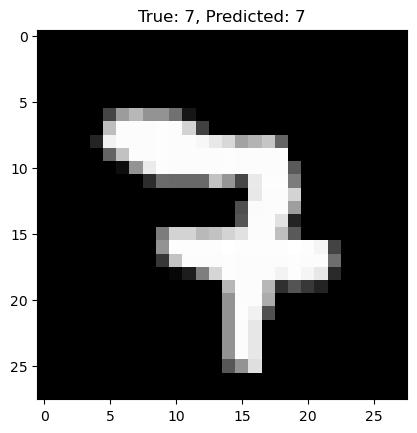

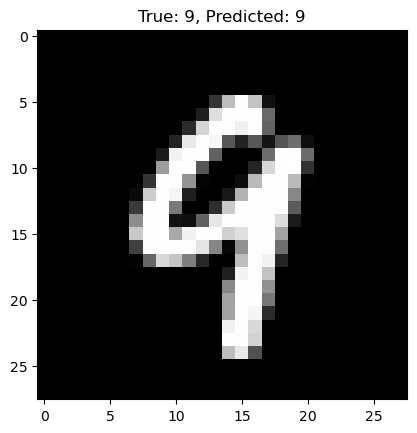

In [8]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and keep track of training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions on new data
num_samples = 5
sample_indices = np.random.randint(0, len(x_test), num_samples)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = model.predict(sample_images)

# Plot sample images and their predictions
for i in range(num_samples):
    true_label = np.argmax(sample_labels[i])
    predicted_label = np.argmax(predictions[i])
    
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()
